In [1]:
# Eugenio Andrade Lozano

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report, roc_curve, roc_auc_score

In [3]:
raw_data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv", sep="," )

In [4]:
raw_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
raw_data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
raw_data.corr()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [8]:
# Ordenar por Clase de columna Diabetes
raw_data = raw_data.sort_values(by="Diabetes_012").reset_index(drop=True)
# Eliminar prediabeticos
raw_data = raw_data[raw_data.Diabetes_012 != 1].reset_index(drop=True)
raw_data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0
2,0.0,1.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
3,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
4,0.0,1.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,7.0,2.0,0.0,0.0,7.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249044,2.0,0.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,13.0,6.0,8.0
249045,2.0,1.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,0.0,10.0,3.0,2.0
249046,2.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,15.0,15.0,1.0,0.0,10.0,4.0,4.0
249047,2.0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,4.0,25.0,1.0,0.0,11.0,6.0,6.0


In [9]:
# Cantidad de valores sin prediabetes
raw_data["Diabetes_012"].value_counts()

0.0    213703
2.0     35346
Name: Diabetes_012, dtype: int64

In [10]:
# Eliminar los primeros 160,000 valores de gente sin diabetes
# Más parejo la clasificación entre con y sin diabetes
df = raw_data.tail(raw_data.shape[0] - 160000).reset_index(drop=True)
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,4.0,1.0,0.0,12.0,3.0,2.0
1,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,5.0,6.0,8.0
2,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,4.0,6.0,7.0
3,0.0,1.0,1.0,1.0,38.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0,7.0
4,0.0,1.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89044,2.0,0.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,13.0,6.0,8.0
89045,2.0,1.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,0.0,10.0,3.0,2.0
89046,2.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,15.0,15.0,1.0,0.0,10.0,4.0,4.0
89047,2.0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,4.0,25.0,1.0,0.0,11.0,6.0,6.0


In [11]:
df["Diabetes_012"].value_counts()

0.0    53703
2.0    35346
Name: Diabetes_012, dtype: int64

# Paso 2: Limpia de Datos
* Eliminar Columnas Innecesarias: Education, Income, NoDocbcCost, AnyHealthcare, CholCheck, GenHlth, MenthHlth, PhysHilth, Sex, Age, Fruits, Veggies.
* Crear columna con la suma de indicadores de diabetes.
* Filtrar para tener las columnas importantes (Diabetes_012, BMI, y la Suma de los indicadores).

In [12]:
df = df.drop(["Education", "CholCheck", "Income", "NoDocbcCost", "Fruits", "Veggies", "AnyHealthcare", "GenHlth", "MentHlth", "PhysHlth", "Sex", "Age"], axis=1)
df

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,DiffWalk
0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,24.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,22.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
89044,2.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,0.0
89045,2.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,1.0
89046,2.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0
89047,2.0,1.0,0.0,39.0,0.0,0.0,0.0,1.0,0.0,1.0


In [13]:
df["Sum"] = df["HighBP"] + df["HighChol"] + df["Smoker"] + df["Stroke"] + df["HeartDiseaseorAttack"] + df["HvyAlcoholConsump"] + df["DiffWalk"]
df

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,DiffWalk,Sum
0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
1,0.0,0.0,0.0,24.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.0,0.0,0.0,22.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
4,0.0,1.0,0.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
89044,2.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
89045,2.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0
89046,2.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
89047,2.0,1.0,0.0,39.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0


In [14]:
df = df.filter(["Diabetes_012", "BMI", "Sum"])
df

,Diabetes_012,BMI,Sum
0,0.0,26.0,3.0
1,0.0,24.0,1.0
2,0.0,22.0,0.0
3,0.0,38.0,3.0
4,0.0,24.0,1.0
...,...,...,...
89044,2.0,27.0,2.0
89045,2.0,24.0,4.0
89046,2.0,27.0,3.0
89047,2.0,39.0,2.0


# Paso 3: Análisis Gráfico del dataset

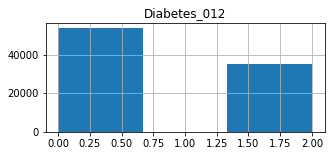

In [15]:
# Mostrar histogramas de las columnas
df.hist(column="Diabetes_012", bins=3, figsize=(5,2))
plt.show()

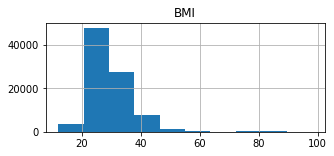

In [16]:
df.hist(column="BMI", bins=10, figsize=(5,2))
plt.show()

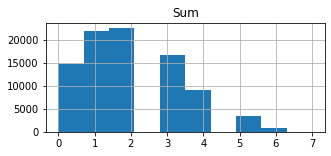

In [17]:
df.hist(column="Sum", bins=10, figsize=(5,2))
plt.show()

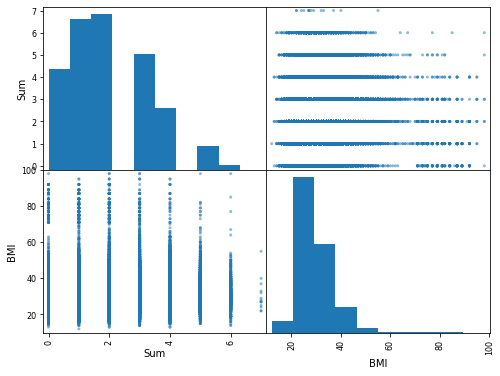

In [46]:
# Matriz de Scatter
attributes = ["Sum","BMI"]
scatter_matrix(df[attributes], figsize=(8,6))
plt.show()

<AxesSubplot:>

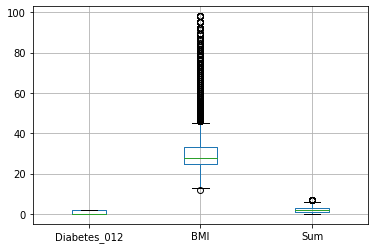

In [19]:
# Boxplot
df.boxplot()

# Paso 4: Predicciones del Dataset

In [20]:
# Genera la matriz de instancias y el vector de salidas (hint: numpy array)
x = np.array(df[["BMI", "Sum"]])
y = np.array(df["Diabetes_012"])
#Normalizar datos al rango [0,1]
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [21]:
# Genera los training y test sets (hint: train_test_split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [22]:
# KNN (K Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train.ravel())
# DTC (Árboles de Decisión)
clf = DecisionTreeClassifier(max_depth=4)
scaler = MinMaxScaler()
clf.fit(x_train, y_train)

# NN (Neural Network)
nn = MLPClassifier(hidden_layer_sizes=(80,))
nn.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(80,))

In [23]:
# SVM (Support Vector Machine)
svm = SVC(degree=2)
svm.fit(x_train, y_train)

SVC(degree=2)

### 4.1.1 Predicciones y Score

In [24]:
# Preddiciones con el test sample de x
y_pred = knn.predict(x_test)
y_pred_dt = clf.predict(x_test)
y_pred_nn = nn.predict(x_test)
y_pred_svm = svm.predict(x_test)

In [25]:
# Medir la taza de precisión del modelo.
precision = precision_score(y_test, y_pred, average="micro")
precision_dt = precision_score(y_test, y_pred_dt, average="micro")
precision_nn = precision_score(y_test, y_pred_nn, average="micro")
precision_svm = precision_score(y_test, y_pred_svm, average="micro")

print("La precisión del modelo KNN es: ", precision *100, "%")
print("La precisión del modelo Decision Treees: ", precision_dt *100, "%")
print("La precisión del modelo Neural Networks: ", precision_nn *100, "%")
print("La precisión del modelo SVM: ", precision_svm *100, "%")

La precisión del modelo KNN es:  62.38068500842223 %
La precisión del modelo Decision Treees:  70.62324536777092 %
La precisión del modelo Neural Networks:  70.84783829309377 %
La precisión del modelo SVM:  70.44357102751263 %


### 4.1.2 Validación Cruzada

In [26]:
# Validación Cruzada
scores = cross_val_score(knn, x_train, y_train.ravel(), cv=5, scoring="accuracy")
final_score = sum(scores) / len(scores)
scores_dt = cross_val_score(clf, x_train, y_train.ravel(), cv=5, scoring="accuracy")
final_score_dt = sum(scores_dt) / len(scores_dt)
scores_nn = cross_val_score(nn, x_train, y_train.ravel(), cv=5, scoring="accuracy")
final_score_nn = sum(scores_nn) / len(scores_nn)
# scores_svm = cross_val_score(svm, x_train, y_train.ravel(), cv=5, scoring="accuracy")
# final_score_svm = sum(scores_svm) / len(scores_svm)
print("La precisión usando validación cruzada en KNN es:", final_score*100,"%")
print("La precisión usando validación cruzada en DTC es:", final_score_dt*100,"%")
print("La precisión usando validación cruzada en NN es:", final_score_nn*100,"%")
# print("La precisión usando validación cruzada en SVM es:", final_score_svm*100,"%")

La precisión usando validación cruzada en KNN es: 64.48433000483529 %
La precisión usando validación cruzada en DTC es: 70.57650502935948 %
La precisión usando validación cruzada en NN es: 71.05658048640284 %


## 4.2 Matrices de Confusión por Modelo

#### 4.2.1 KNearestNeighbors

In [27]:
# KNN
y_pred = cross_val_predict(knn, x_test, y_test.ravel(), cv=5)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[8265, 2490],
       [3393, 3662]])

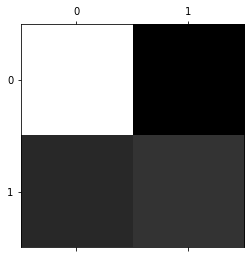

In [28]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

#### 4.2.2 Decision Tree

In [29]:
# CLF
y_pred_dt = cross_val_predict(clf, x_test, y_test.ravel(), cv=5)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
conf_matrix

array([[8580, 2175],
       [3066, 3989]])

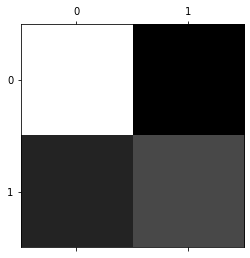

In [30]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

#### 4.2.3 Neural Network

In [31]:
# NN
y_pred_nn = cross_val_predict(nn, x_test, y_test.ravel(), cv=5)
conf_matrix = confusion_matrix(y_test, y_pred_nn)
conf_matrix

array([[8611, 2144],
       [2999, 4056]])

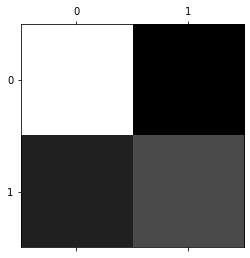

In [32]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

#### 4.2.4 SVM

In [33]:
# SVM
y_pred_svm = cross_val_predict(svm, x_test, y_test.ravel(), cv=5)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
conf_matrix

array([[8638, 2117],
       [3091, 3964]])

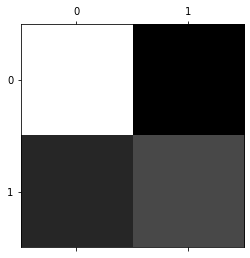

In [34]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

### 4.3 Precisión, Recall y F1 score por Modelo

In [35]:
print("La precisión KNN es:", precision_score(y_test, y_pred, average="micro")*100,"%")
print("El recall KNN es:", recall_score(y_test, y_pred, average="micro")*100, "%")
print("---------------------------------------------------")
print("La precisión en Decision Tree es:", precision_score(y_test, y_pred_dt, average="micro")*100,"%")
print("El recall en Decision Tree es:", recall_score(y_test, y_pred_dt, average="micro")*100, "%")
print("---------------------------------------------------")
print("La precisión NN es:", precision_score(y_test, y_pred_nn, average="micro")*100,"%")
print("El recall NN es:", recall_score(y_test, y_pred_nn, average="micro")*100, "%")
print("---------------------------------------------------")
print("La precisión SVM es:", precision_score(y_test, y_pred_svm, average="micro")*100,"%")
print("El recall SVM es:", recall_score(y_test, y_pred_svm, average="micro")*100, "%")

La precisión KNN es: 66.9679955081415 %
El recall KNN es: 66.9679955081415 %
---------------------------------------------------
La precisión en Decision Tree es: 70.57271195957327 %
El recall en Decision Tree es: 70.57271195957327 %
---------------------------------------------------
La precisión NN es: 71.12296462661426 %
El recall NN es: 71.12296462661426 %
---------------------------------------------------
La precisión SVM es: 70.75800112296463 %
El recall SVM es: 70.75800112296463 %


In [36]:
# F1 Score
print("El F1 score KNN es", f1_score(y_test, y_pred, average="micro")*100, "%")
print("El F1 score Decision Tree es", f1_score(y_test, y_pred_dt, average="micro")*100, "%")
print("El F1 score Neural Network es", f1_score(y_test, y_pred_nn, average="micro")*100, "%")
print("El F1 score SVM es", f1_score(y_test, y_pred_svm, average="micro")*100, "%")

El F1 score KNN es 66.9679955081415 %
El F1 score Decision Tree es 70.57271195957327 %
El F1 score Neural Network es 71.12296462661426 %
El F1 score SVM es 70.75800112296463 %


### 4.4 Reporte de Clasificación

In [37]:
# Reporte de Clasificación
print("KNN")
print(classification_report(y_test, y_pred, target_names=["0", "2"]))
print("---------------------------------------------------")
print("Decision Tree")
print(classification_report(y_test, y_pred_dt, target_names=["0", "2"]))
print("---------------------------------------------------")
print("Neural Network")
print(classification_report(y_test, y_pred_nn, target_names=["0", "2"]))
print("---------------------------------------------------")
print("SVM")
print(classification_report(y_test, y_pred_svm, target_names=["0", "2"]))

KNN
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10755
           2       0.60      0.52      0.55      7055

    accuracy                           0.67     17810
   macro avg       0.65      0.64      0.65     17810
weighted avg       0.66      0.67      0.67     17810

---------------------------------------------------
Decision Tree
              precision    recall  f1-score   support

           0       0.74      0.80      0.77     10755
           2       0.65      0.57      0.60      7055

    accuracy                           0.71     17810
   macro avg       0.69      0.68      0.68     17810
weighted avg       0.70      0.71      0.70     17810

---------------------------------------------------
Neural Network
              precision    recall  f1-score   support

           0       0.74      0.80      0.77     10755
           2       0.65      0.57      0.61      7055

    accuracy                           0.71  

### 4.5 Grafica de Arbol de Decisión

In [38]:
# Gráficar el árbol de decisión
attr_names = ["BMI", "Sum"]
class_names = ["0", "2"]
export_graphviz(clf, 
                out_file="my_tree.dot",
                feature_names=attr_names,
                class_names=class_names,
                rounded=True,
                filled=True
)
# Instalar Graphviz: https://graphviz.org/download/
# Una vez instalador, ejecutar lo siguiente en la terminal (en el directorio donde esté el archivo my_tree.dot):
# >dot -Tpng my_tree.dot -o my_tree.png

Árbol de Decisión
![title](diabetes.png)

### 4.6 Curva ROC

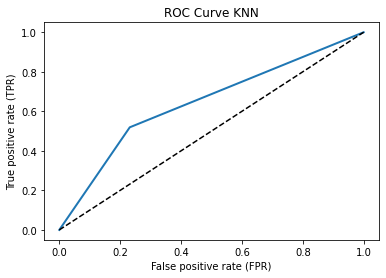

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("ROC Curve KNN")
plot_roc_curve(fpr, tpr)
plt.show()

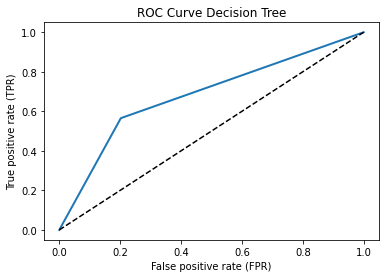

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt, pos_label=2)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("ROC Curve Decision Tree")
plot_roc_curve(fpr, tpr)
plt.show()

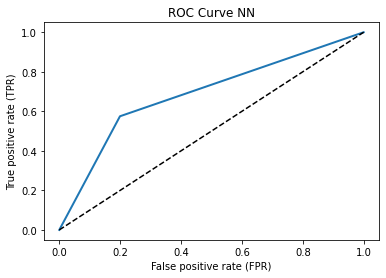

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nn, pos_label=2)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("ROC Curve NN")
plot_roc_curve(fpr, tpr)
plt.show()

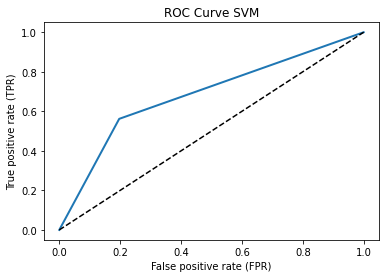

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm, pos_label=2)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("ROC Curve SVM")
plot_roc_curve(fpr, tpr)
plt.show()

In [43]:
print("El roc_score de KNN es: " + str(roc_auc_score(y_test, y_pred)*100))
print("El roc_score de Decision Tree es: " + str(roc_auc_score(y_test, y_pred_dt)*100))
print("El roc_score de NN es: " + str(roc_auc_score(y_test, y_pred_nn)*100))
print("El roc_score de SVM es: " + str(roc_auc_score(y_test, y_pred_svm)*100))

El roc_score de KNN es: 64.3772135057582
El roc_score de Decision Tree es: 68.15915396758088
El roc_score de NN es: 68.77811352061786
El roc_score de SVM es: 68.25161668908797
